In [ ]:
# PyGIMLi Tutorial
# based on https://www.pygimli.org/_tutorials_auto/index.html

In [3]:
import pygimli as pg
print(pg.__version__)

1.1.0+0.g47c8d810 (with local changes)


# Basics

In [4]:
# To create a 2d grid you need to give two arrays/lists 
# for the sampling points in x and y direction, respectively, or just numbers.

grid = pg.createGrid(x=[-1.0, 0.0, 1.0, 4.0], y=(-1.0, 0.0, 1.0, 4.0))
print(grid)

Mesh: Nodes: 16 Cells: 9 Boundaries: 24


In [6]:
# Or you can access them manually:

print('Mesh: Nodes:', grid.nodeCount(),
      'Cells:', grid.cellCount(),
      'Boundaries:', grid.boundaryCount()
      )

Mesh: Nodes: 16 Cells: 9 Boundaries: 24


In [7]:
# You can iterate through all cells of the general type GIMLI::Cell that also provides a lot of methods. 
# Here we list the number of nodes and the node ids per cell:

for cell in grid.cells():
    print("Cell", cell.id(), "has", cell.nodeCount(),
          "nodes. Node IDs:", [n.id() for n in cell.nodes()])

print(type(grid.cell(0)))

Cell 0 has 4 nodes. Node IDs: [0, 1, 5, 4]
Cell 1 has 4 nodes. Node IDs: [1, 2, 6, 5]
Cell 2 has 4 nodes. Node IDs: [2, 3, 7, 6]
Cell 3 has 4 nodes. Node IDs: [4, 5, 9, 8]
Cell 4 has 4 nodes. Node IDs: [5, 6, 10, 9]
Cell 5 has 4 nodes. Node IDs: [6, 7, 11, 10]
Cell 6 has 4 nodes. Node IDs: [8, 9, 13, 12]
Cell 7 has 4 nodes. Node IDs: [9, 10, 14, 13]
Cell 8 has 4 nodes. Node IDs: [10, 11, 15, 14]
<class 'pygimli.core._pygimli_.Quadrangle'>


In [11]:
# To find the grid generation input arrays x and y, you can use the build-in GIMLI::Vector
# (pre-defined with value type double as pg.Vector), 
# standard python lists or numpy arrays, which are widely compatible with GIMLi vectors.

import numpy as np

grid = pg.createGrid(x=np.linspace(-1.0, 1.0, 10),
                     y=1.0 - np.logspace(np.log10(1.0), np.log10(2.0), 10))

print(grid.cellCount())

81


In [12]:
#rectangles of type GIMLI::Quadrangle being derived from the base type GIMLI::Cell,
print(grid.boundaryCount())
# edges of type GIMLI::Edge, which are boundaries of the general type GIMLI::Boundary.

180


In [13]:
# The mesh can be saved and loaded in our binary mesh format .bms. 
# Or exported into .vtk format for 2D or 3D visualization using Paraview.

In [14]:
# However, we recommend visualizing 2-dimensional content using python scripts that provides better exports 
# to graphics files (e.g., png, pdf, svg). 
# In pygimli we provide some basic post-processing routines using the matplotlib visualization framework. 
# The main visualization call is pygimli.viewer.show which is sufficient for the most meshs, fields, models 
# and streamline views.

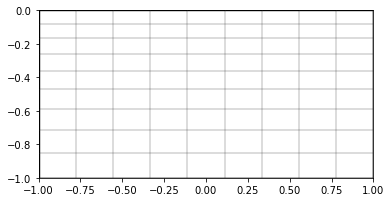

In [15]:
pg.viewer.show(grid)
pg.wait()

# The anatomy of a pyGIMLi mesh

In [2]:
import matplotlib.pyplot as plt

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

def circle(x, y, text=None, radius=0.15, c="blue"):
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)
    ax.plot(x, y, color=c, marker=".")
    ax.text(x, y - (radius + 0.05), text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color=c)

In [3]:
import pygimli as pg
m = pg.createGrid(4,4)

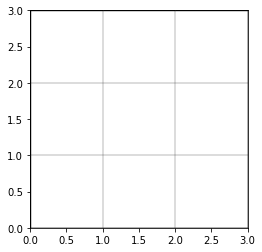

In [4]:
pg.viewer.show(m)
pg.wait()

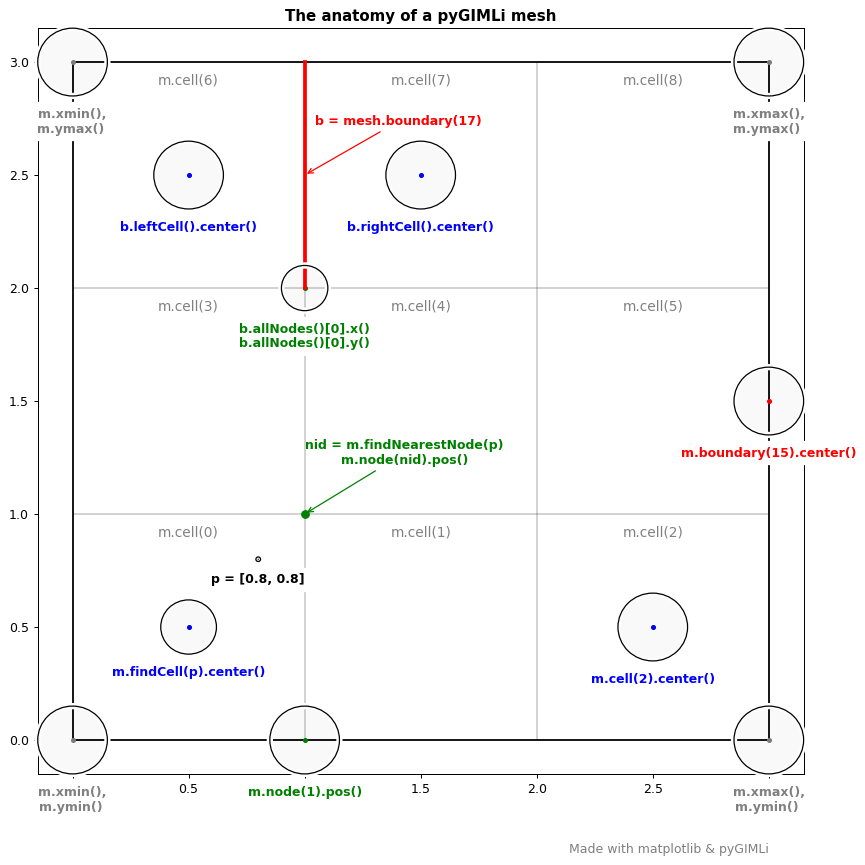

In [5]:
# Create matplotlib figure and set size
fig, ax = plt.subplots(figsize=(11,11), dpi=90)
ax.set_title("The anatomy of a pyGIMLi mesh", fontweight="bold")

# Visualize mesh with the generic pg.show command
pg.show(m, ax=ax)

# Number all cells
for cell in m.cells():
    node = cell.allNodes()[2]
    ax.text(node.x() - 0.5, node.y() - .05, "m.cell(%d)" % cell.id(),
            fontsize=11, ha="center", va="top", color="grey")

# Mark horizontal and vertical extent
circle(m.xmin(), m.xmax(), "m.xmin(),\nm.ymax() ", c="grey")
circle(m.xmin(), m.ymin(), "m.xmin(),\nm.ymin() ", c="grey")
circle(m.xmax(), m.ymin(), "m.xmax(),\nm.ymin() ", c="grey")
circle(m.xmax(), m.ymax(), "m.xmax(),\nm.ymax() ", c="grey")

# Mark center of a cell
cid = 2
circle(m.cell(cid).center().x(), m.cell(cid).center().y(),
       "m.cell(%d).center()" % cid)

# Mark node
circle(m.node(1).x(), m.node(1).y(), "m.node(1).pos()", c="green")

# Find cell in which point p lies
p = [0.8, 0.8]
circle(p[0], p[1], "p = %s" % p, radius=0.01, c="black")

cell = m.findCell(p)
circle(cell.center().x(), cell.center().y(), "m.findCell(p).center()",
       radius=0.12)

# Find closest node to point p
nid = m.findNearestNode(p)
n = m.node(nid)
ax.plot(n.x(), n.y(), "go")
ax.annotate('nid = m.findNearestNode(p)\nm.node(nid).pos()', xy=(n.x(), n.y()),
            xycoords='data', xytext=(80, 40), textcoords='offset points',
            ha="center", weight='bold', color="green",
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc",
                            color="green"))

# Mark boundary center
bid = 15
boundary_center = m.boundary(bid).center()
circle(boundary_center.x(), boundary_center.y(),
       "m.boundary(%d).center()" % bid, c="red")

# Mark boundary together with left and right cell
bid = 17
b = m.boundaries()[bid] # equivalent to mesh.boundary(17)
n1 = b.allNodes()[0]
n2 = b.allNodes()[1]
ax.plot([n1.x(), n2.x()], [n1.y(), n2.y()], "r-", lw=3, zorder=10)
ax.annotate('b = mesh.boundary(%d)' % bid, xy=(b.center().x(), b.center().y()),
            xycoords='data', xytext=(8, 40), textcoords='offset points',
            weight='bold', color="red",
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc",
                            color="red"))
circle(n1.x(), n1.y(), "b.allNodes()[0].x()\nb.allNodes()[0].y()",
       radius=0.1, c="green")

# Mark neighboring cells
left = b.leftCell()
right = b.rightCell()
circle(left.center().x(), left.center().y(),
       "b.leftCell().center()", c="blue")
circle(right.center().x(), right.center().y(),
       "b.rightCell().center()", c="blue")

ax.text(3.0, -0.5, "Made with matplotlib & pyGIMLi",
        fontsize=10, ha="right", color='.5')
fig.tight_layout(pad=5.7)
pg.wait()


In [6]:
m.xmin()

0.0

In [7]:
m.xmax()

3.0

In [17]:
p=[0.8,0.8]

In [18]:
m.findCell(p)